<a href="https://colab.research.google.com/github/nutyfreshz/MADT8101_Customer_Analytics/blob/main/EP_6_8_Customer_Churn_Campaign_Scoring_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Customer Scoring**

## **What is Customer scoring ?**

Customer scoring is a technique that assigns a score to each customer based on their characteristics and behavior. It helps identify high-potential customers for targeted marketing efforts, aiming to improve performance by focusing on those likely to make purchases.

##**Use case**

Using transaction data in e-commerce to analyze the customer database and identify segments with different attributes, like high-value customers who make frequent large purchases and have high satisfaction scores. Tailoring marketing campaigns to target these segments leads to improved sales performance and customer engagement.

**Another use case**:

* In the social media video section, potential users can be identified by analyzing those who watch videos in 4K or 8K resolution. The assumption is that users who can afford high-speed internet and are willing to pay for higher resolution videos might have higher spending power.

* Analyzing check-in frequency in high-paying areas helps luxury retail brands strategically plan new store openings and design targeted marketing campaigns for customers with higher purchasing power.


 Converting raw metrics into scores using percentiles and then incorporating weights based on priority

**Example of calculatind customer scoring:**

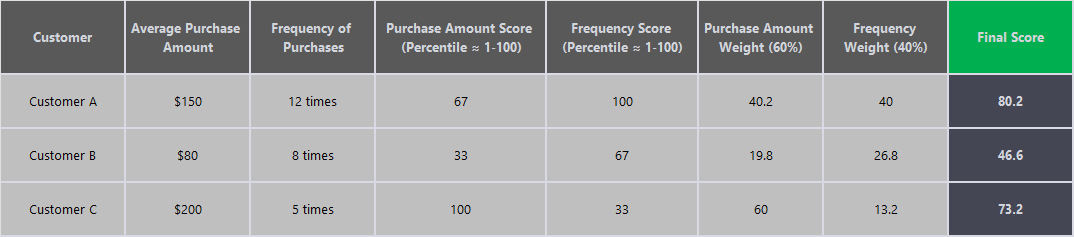

RFM scoring can be a valuable and effective method for customer segmentation and analysis. While there are opportunities to enhance RFM scoring follwing these example:

* **RFM Customization**: Customizable RFM scoring allows businesses to adjust the weighting of metrics based on their goals and industry. For instance, an e-commerce company could prioritize frequency to encourage repeat purchases.

* **Combine RFM with Other Metrics**: Businesses can enhance customer understanding by combining RFM scoring with customer satisfaction scores, engagement metrics, and social media interactions. This integration provides a more comprehensive view of customers and their behavior.

* **Dynamic RFM Segmentation**: Dynamic RFM segmentation allows businesses to continuously re-segment customers based on their changing behavior, as opposed to using fixed segments.

* **Predictive RFM Analysis**: Predictive analytics uses historical data to forecast customer behavior, helping businesses anticipate trends and identify high-value customers or those at risk of churning.

* **Personalization**: Utilize RFM scores for personalized marketing campaigns, targeting distinct customer segments with customized promotions and offers.

#WORKSHOP

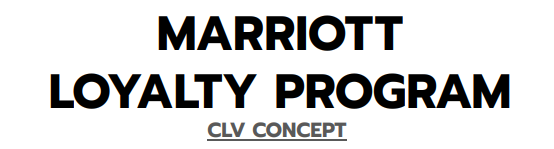

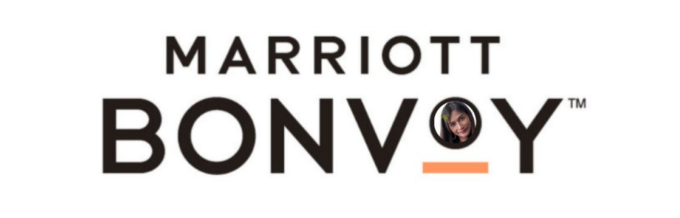

## **Problem statement**

**Loss of opportunity to sell high segment hotel and Room type**

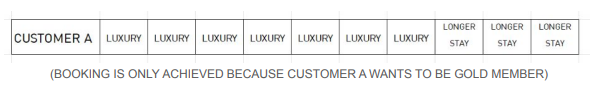

Customer A consistently stays at luxury accommodations but misses three nights, which prevents them from achieving Gold member status. As a result, they are required to buy a longer stay to attain the desired status.

This situation results in lowered revenue for the business, as the average spending of Customer A decreases due to the extra cost of extending their stay to meet the membership requirements.

##**Can be improve**

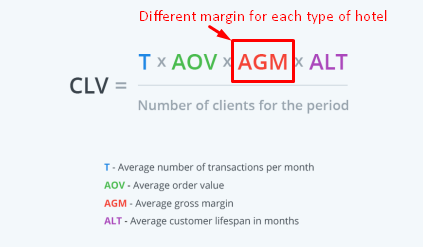

In this case, we use Method 2: CLV equation because each type of hotel have different margin

Use this method to re-calculate point for new loyalty tiers to treat them more excecutive.

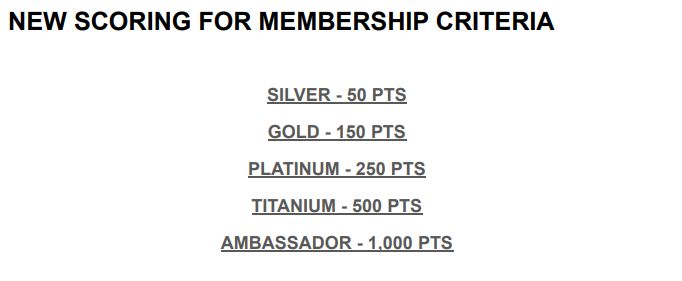

**Existing loyalty program**

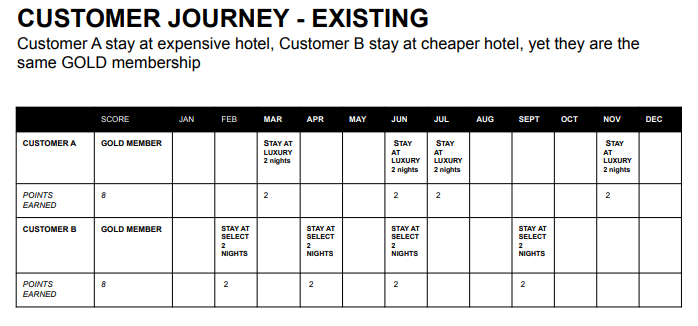

**Improved loyalty program by CLV**

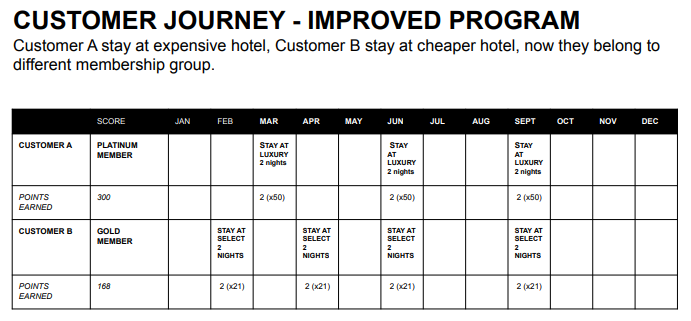

**To summarize**

1. New BONVOY loyalty program now uses new CLV equation to create
customer lifetime value
2. New BONVOY loyalty program now reflects true customer stay
3. New BONVOY loyalty program secures high spenders (where as
prior to this, high spenders may also have high churn rate)

#**2. Churn scoring**

##**What is churn score ?**

Churn score is a metric used by businesses to predict the likelihood of a customer ending their relationship with the company. It involves analyzing historical customer data using predictive analytics techniques.


## **Churn type**

### **1. Churn: Contractual**

Clear ending cycle eg. Subscription model

#### **Challenge of Churn (Type: Contractual)**

1. Customers have interested in contract renewal at various levels.

  * **Assumption 1**: Customers with churn probability between 40% to 50% can be influenced with interested mechanics to expedite contract renewal consideration.

  * **Assumption 2**: Customers with churn probability between 80% to 90% should be evaluated based on conversion rates and ROI to determine on camapign performance history if it's worth bringing them back.

2. The churn model's feature selection process must avoid using features that could introduce bias and lead to artificially high model performance eg. **Early termination of the contract**.

### **2. Churn: Non-Contractual**

Unclear ending cycle eg. Business with not use subsription model.

#### **Challenge of Churn (Type: Non-Contractual)**

1. Churn flag, customer cycle were have dynamic period. Period can not be fixed depend on Industry, Category and etc.

e.g. Retail industry, Watch vs Skincare category have different %retention for each category.

Using Cohort Analysis to implement customer retention.

2. Discover the reasons for their churn. If we don't include business logic in our features engineering, we won't be able to effectively incorporate features importance into our strategy.

3. Customer churn: Determining the value of bringing them back and assessing the feasibility of our efforts through a business impact analysis.

#### **Cohort analysis (Code)**

In [ ]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M')

In [ ]:
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [ ]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [ ]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()

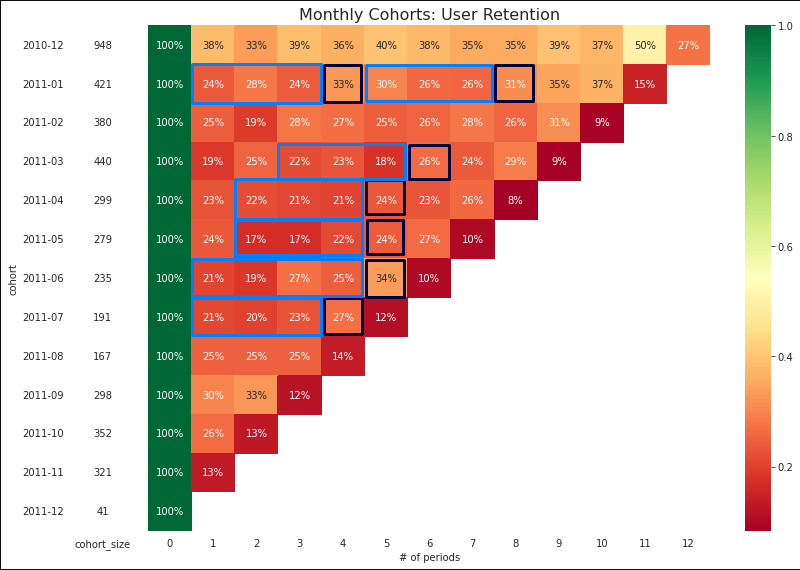

From example above, we can see on this transaction data, customer retention will spike back around 3-4 months.

* We can set criteria customer who was not participate within 4 months will be flaged as churn. Furthermore, we can use Recency metric from RFM to implement together with cohort to define churn customer more effectively.

## **Customer movement**

To flag customer status, we have of example status following below:

1. new new
2. re-activated
3. exisitng (repeat)
3. likely to lasped
4. lapsed

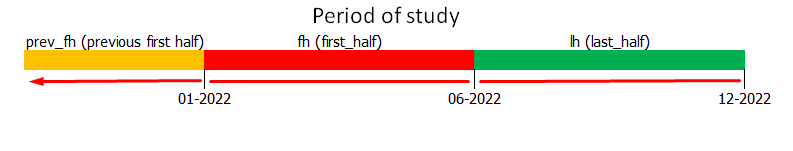

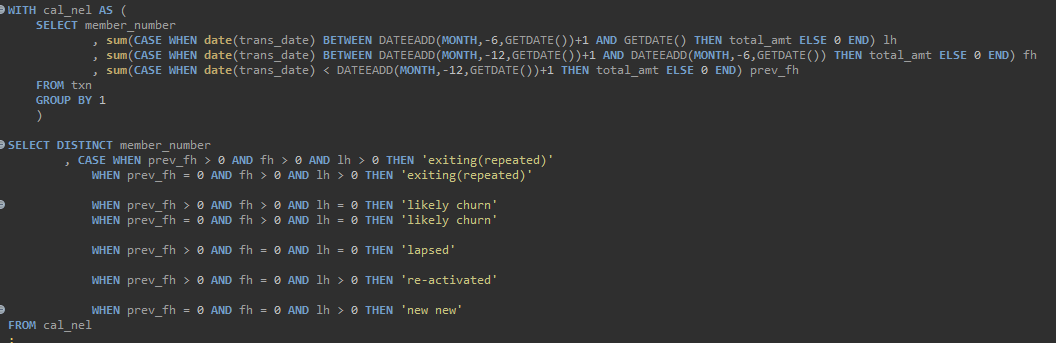

For the report, we can recurring the customer movement into 2 simple perspectives:

1. Customer status view: In this perspective, we will not fix the same customer but we will see customer status proportion changing by period (MoM or YoY).

2. Customer view: In this perspective, we will fix the same customer and calculate status switch rate by using previous status and current status with Sankey chart to visualize the movement.
  *  Example: If large amount of customer status move to churn or likely to churn, we need to analyse what going on and set up strategy to reduce the rates.  

# **3. Campaign scoring**

Technique used in marketing and advertising to evaluate the effectiveness and potential success of marketing campaigns.

**In this case**, we will use ROI to evaluate how success the campaign by using up-selling, cross selling technique and etc.

## **Up-selling**

Increase quantity or amount of purchasing on the same product sku.

* **Up-selling at the purchase**
  * Up size for Hamburger or Buy 2 get special discount by limited time offer to make customer consider faster.

* **Up-selling after the purchase**
  * Advanced airline ticket



### **Up-selling with tier analysis**

Distribution Analysis by spending metrics such as spending per customer, spending per visit and etc.

Which metric we should use?
  It's depend on campaign mechanics that spend with in a day or accumulate spending by member.

In this case, we will use spending per visit tier because our mechanics is spend with in a day.



#### **Distribution by spend per visit tier**

1. Exclude promotion period - to reduce bias spending tier from normal behavior.

2. Visualize with histrogram chart to see spending range which one have opportunity.

From normal behavior, the more spending the less customer.

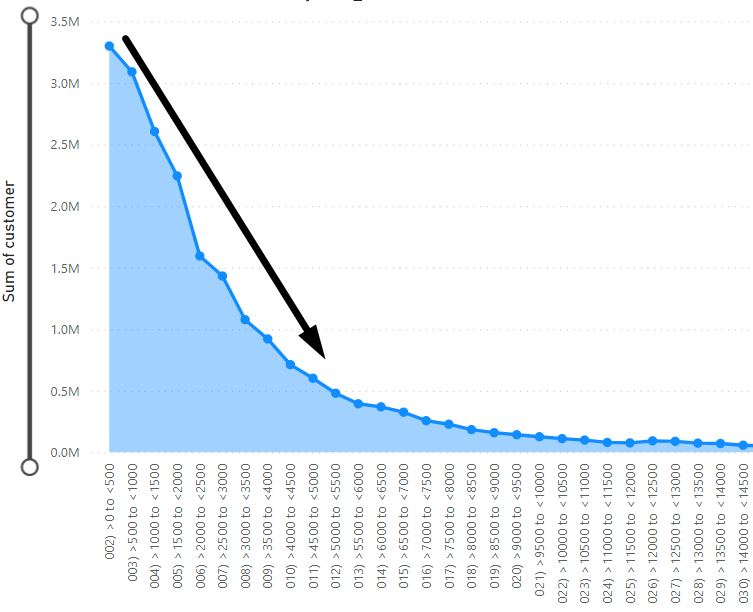

3. Find opportunies with flat or spike slope on spending range.

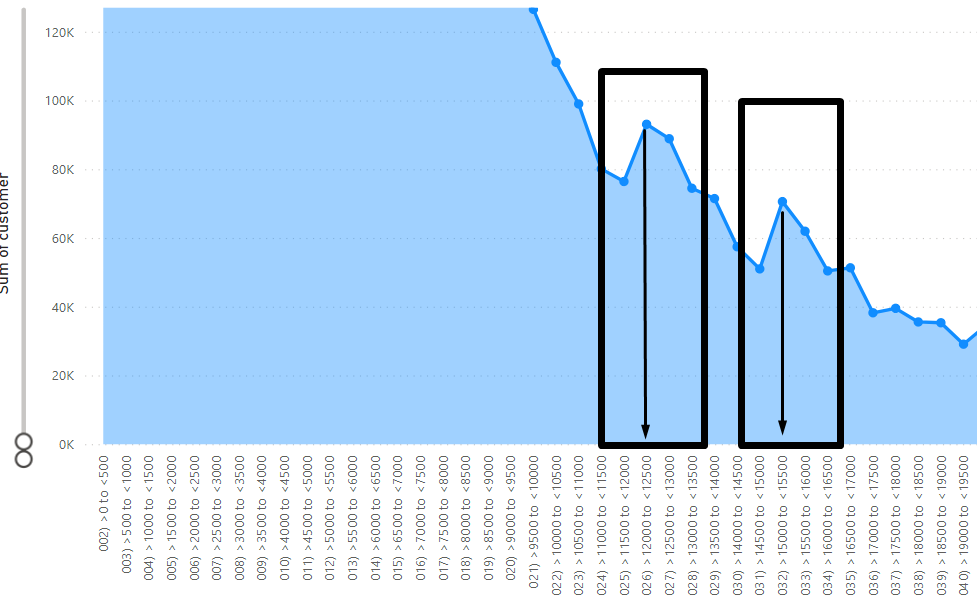

* customer likely to buy this tier lead to spike slope

4. After setup spending tier, we can check up spending tier which customer activate or not.

* If slope spike up that mean customer willing to pay at this range.

Note: We can cross analysis with segment to see probability to strect up.

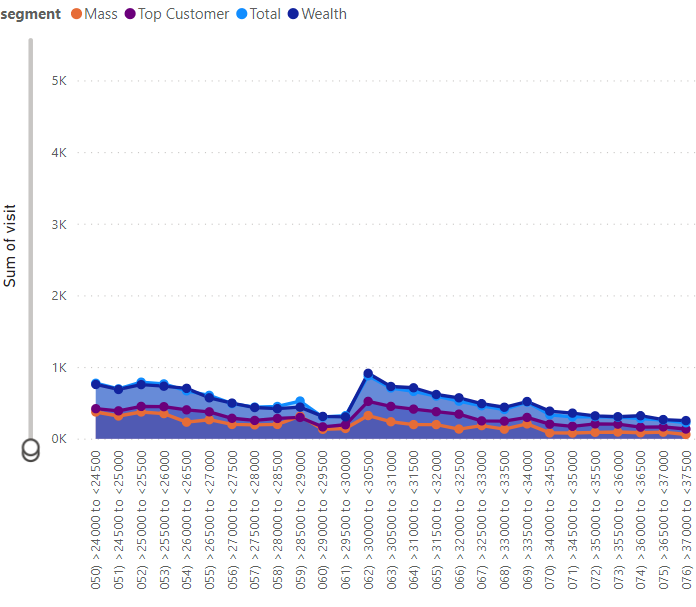

From above example, we can see opportunity to use 30K tier to stretch up bacause on this retail they have mechanics 3k, 5k, 10k, 50k spend in a day which can make customer more visibility on 30k to make them participate.

**Caution:** To simulate stretch up sales impact with spending per visit, customer can be dupplicate so we need to convert them into
 unique customer and calculate strech up sales

 Spending per customer x # customer x proba = Sales expected

## **Cross-selling (Basket analysis)**

Increase quantity or amount of purchasing on another product sku.

* Example of Cross-selling):
  * Insurance in Air line ticket
  * Beer and Diaper

Note: Be avoid to do basket analysis if
1.  Low number of brand or product sku.

2. Alway on Promotion transaction - this data can be bias if businesss run promotion all the time.  

#### Methadology for Basket analysis (Cross-sell)

Calculate platform: Python

Library: Apriori


##### **Code for basket analysis**

In [ ]:
!pip install apyori

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
## prep data for basket analysis

df_cluster_0_prep = df_cluster_0.sort_values(by='date')

df_cluster_0_prep = df_cluster_0_prep[['customer_id', 'brand']].drop_duplicates()

df_group_0 = df_cluster_0_prep.groupby(['customer_id'])['brand'].apply('|'.join).reset_index()

df_trans_0 = df_group_0['brand'].str.get_dummies('|').astype(pd.SparseDtype('bool'))

In [ ]:
frequent_itemsets_0 = apriori(df_trans_0
                           , min_support = 0.05
                           , use_colnames = True)

frequent_itemsets_0.sort_values('support'
                             , ascending = False)

In [ ]:
asso_rule_0 = association_rules(frequent_itemsets_0
                             , metric = 'lift'
                             , min_threshold = 1)

asso_rule_0.sort_values('support'
                     , ascending = False
                     , inplace = True)

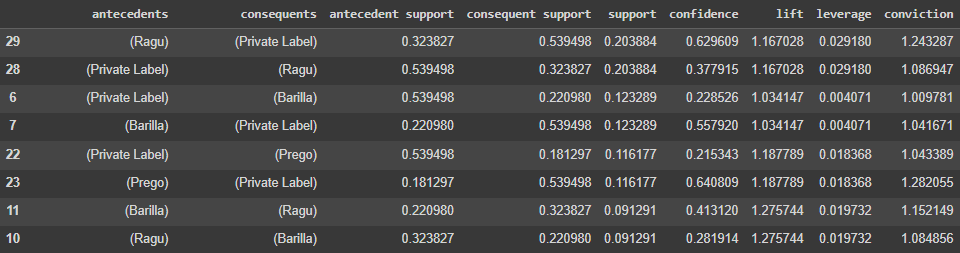

After we do basket analysis, we need to implement business impact which was impact on financial or econimics values or not.